In [73]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [74]:
data = pd.read_csv("sound_features.csv", index_col=0)
df = pd.DataFrame(data)
df.columns

Index(['zcr_mean', 'rms_mean', 'pitch_mean', 'emotion', 'intensity',
       'mfcc_mean1', 'mfcc_mean2', 'mfcc_mean3', 'mfcc_mean4', 'mfcc_mean5',
       'mfcc_mean6', 'mfcc_mean7', 'mfcc_mean8', 'mfcc_mean9', 'mfcc_mean10',
       'mfcc_mean11', 'mfcc_mean12', 'mfcc_mean13', 'mfcc_std1', 'mfcc_std2',
       'mfcc_std3', 'mfcc_std4', 'mfcc_std5', 'mfcc_std6', 'mfcc_std7',
       'mfcc_std8', 'mfcc_std9', 'mfcc_std10', 'mfcc_std11', 'mfcc_std12',
       'mfcc_std13', 'chroma_mean1', 'chroma_mean2', 'chroma_mean3',
       'chroma_mean4', 'chroma_mean5', 'chroma_mean6', 'chroma_mean7',
       'chroma_mean8', 'chroma_mean9', 'chroma_mean10', 'chroma_mean11',
       'chroma_mean12', 'spectral_contrast_mean1', 'spectral_contrast_mean2',
       'spectral_contrast_mean3', 'spectral_contrast_mean4',
       'spectral_contrast_mean5', 'spectral_contrast_mean6',
       'spectral_contrast_mean7', 'tonnetz_mean1', 'tonnetz_mean2',
       'tonnetz_mean3', 'tonnetz_mean4', 'tonnetz_mean5', 'tonnetz_mea

In [75]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])
print(train.shape)
print(test.shape)
print(valid.shape)

(864, 56)
(288, 56)
(288, 56)


C:\Users\callu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [76]:
def scale_set(data, oversample):
    feature_cols = [i for i in range(data.shape[1])if i != 3]
    x = data.iloc[:, feature_cols].values
    y = data.iloc[:, 3].values
    
    scalar = StandardScaler()
    x = scalar.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y)
    
    data = np.hstack((x, np.reshape(y,(-1,1))))

    return data, x, y


In [77]:
train, X_train, y_train = scale_set(train, True)
valid, X_valid, y_valid = scale_set(valid, False)
test, X_test, y_test = scale_set(test, False)
y_train -= 1
y_test -= 1
print(np.unique(y_train))

[0 1 2 3 4 5 6 7]


Random Forest Model

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [79]:
RFC_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    class_weight='balanced',
    random_state=42
    )
RFC_model = RFC_model.fit(X_train, y_train)

In [80]:
y_pred = RFC_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.28      0.57      0.37        14
           1       0.51      0.73      0.60        37
           2       0.48      0.50      0.49        32
           3       0.57      0.29      0.38        42
           4       0.88      0.71      0.79        49
           5       0.61      0.45      0.52        42
           6       0.51      0.53      0.52        36
           7       0.55      0.67      0.60        36

    accuracy                           0.56       288
   macro avg       0.55      0.56      0.53       288
weighted avg       0.59      0.56      0.56       288



XGBoost

In [81]:
from xgboost import XGBClassifier

In [82]:
XGBC_model = XGBClassifier(
    n_estimators = 200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

In [83]:
XGBC_model.fit(X_train, y_train)

C:\Users\callu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:199: UserWarning: [17:16:46] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [84]:
y_pred = XGBC_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.64      0.49        14
           1       0.57      0.73      0.64        37
           2       0.41      0.53      0.47        32
           3       0.45      0.31      0.37        42
           4       0.85      0.80      0.82        49
           5       0.55      0.38      0.45        42
           6       0.51      0.58      0.55        36
           7       0.59      0.53      0.56        36

    accuracy                           0.56       288
   macro avg       0.54      0.56      0.54       288
weighted avg       0.57      0.56      0.55       288



In [85]:
import tensorflow

In [86]:
y_train_cat = tensorflow.keras.utils.to_categorical(y_train, num_classes=8)  
y_test_cat = tensorflow.keras.utils.to_categorical(y_test, num_classes=8)
y_valid -= 1
y_valid_cat = tensorflow.keras.utils.to_categorical(y_valid, num_classes=8)

In [87]:
nn_model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Dense(64, activation="relu"),
    tensorflow.keras.layers.Dropout(0.3),
    tensorflow.keras.layers.Dense(64, activation="relu"),
    tensorflow.keras.layers.Dropout(0.3),
    tensorflow.keras.layers.Dense(8,activation="softmax")
])

In [88]:
nn_model.compile(optimizer=tensorflow.keras.optimizers.Adam(), loss='categorical_crossentropy')

In [89]:
print(X_train.shape[0])
y_train_cat.shape[0]

976


976

In [90]:
history = nn_model.fit(
    X_train, y_train_cat,
    epochs=50,
    batch_size=32,
    validation_data=(X_valid, y_valid_cat),
    verbose=1,
)


Epoch 1/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 2.1717 - val_loss: 1.9945
Epoch 2/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9849 - val_loss: 1.9293
Epoch 3/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8992 - val_loss: 1.8825
Epoch 4/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8227 - val_loss: 1.8316
Epoch 5/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7695 - val_loss: 1.7866
Epoch 6/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6798 - val_loss: 1.7484
Epoch 7/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6443 - val_loss: 1.7082
Epoch 8/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6249 - val_loss: 1.6702
Epoch 9/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5388 - val_loss: 1.6368
Epoch 10/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5329 - val_loss: 1.6068
Epoch 11/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4575 - val_loss: 1.5746
Epoch 12/50
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4181 - val_lo

In [91]:
def plot_history(history):

    plt.plot(history.history["loss"], label = "loss")
    plt.plot(history.history["val_loss"], label = "val_loss")
    plt.xlabel("Epoch")
    plt.ylabel("Binary crossentropy")
    plt.legend()
    plt.grid(True)

    plt.show()

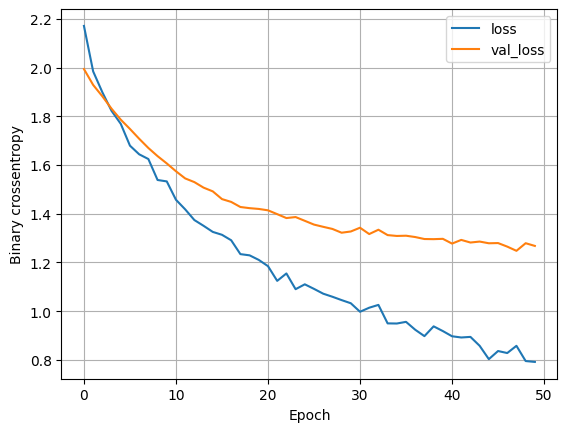

In [92]:
plot_history(history)

In [93]:
y_pred = nn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [94]:
print(classification_report(y_true_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.29      0.50      0.37        14
           1       0.61      0.76      0.67        37
           2       0.48      0.50      0.49        32
           3       0.52      0.31      0.39        42
           4       0.85      0.84      0.85        49
           5       0.53      0.55      0.54        42
           6       0.60      0.69      0.64        36
           7       0.70      0.53      0.60        36

    accuracy                           0.60       288
   macro avg       0.57      0.58      0.57       288
weighted avg       0.61      0.60      0.59       288



In [95]:
import joblib

In [96]:
joblib.dump(XGBC_model, 'XGBC_emotion_model.joblib')
joblib.dump(RFC_model, 'RFC_emotion_model.joblib')
nn_model.save("nn_emotion_model.keras")

In [97]:
print(tensorflow.__version__)

2.20.0
